# <span style="color:green"><ins>Chapitre 2: Vecteurs, matrices et systèmes linéaires</ins></span>

In [1]:
import numpy as np

Dans ce chapitre, nous allons présenter quelques fonctions de la sous-librairie "linalg" de numpy (linear algebra). La liste exhaustive de toutes les fonctions disponibles est présentée sous le lien suivant :
https://numpy.org/doc/stable/reference/routines.linalg.html

## Matrices et vecteurs : syntaxe

On supposera toujours que les matrices et vecteurs sont définis comme des tableaux numpy comme suit :<br/>
Pour définir
\begin{equation*}
A=
\left(
\begin{matrix}
1 & 2\\
3 & 4
\end{matrix}
\right)
\end{equation*}
On code :

In [2]:
A=np.array([[1,2],[3,4]])
print(A)

[[1 2]
 [3 4]]


Pour définir
\begin{equation*}
A=
\left(
\begin{matrix}
1\\
2
\end{matrix}
\right)
\end{equation*}
On code :

In [3]:
A=np.array([[1],[2]])
print(A)

[[1]
 [2]]


Pour définir
\begin{equation*}
A=
\left(
\begin{matrix}
1 & 2
\end{matrix}
\right)
\end{equation*}
On code :

In [4]:
A=np.array([[1,2]])
print(A)

[[1 2]]


## Opérations matricielles versus opérations terme à terme

### La règle

Lorsqu'on écrit `A@B`, c'est une multiplication matricielle, les dimensions de $A$ et $B$ doivent donc satisfaire les propriétés matricielles.<br/>
Lorsqu'on écrit `A*B`, `A/B` ou `A**B`, ce sont des opérations terme à terme (l'opérateur s'applique entre les mêmes composantes de $A$ et $B$). $A$ et $B$ doivent donc avoir la même dimension.

### Exemple 1

Soient les matrices suivantes :

In [5]:
A=np.array([[1,2],[3,4]])
print(A)

[[1 2]
 [3 4]]


In [6]:
B=np.array([[5,0],[2,1]])
print(B)

[[5 0]
 [2 1]]


`A@B` va donner la multiplication matricielle, et `A*B` va donner la multiplication terme à terme (élément (i,j) de $A$ multiplié par l'élément (i,j) de $B$) :

In [7]:
print(A@B)

[[ 9  2]
 [23  4]]


In [8]:
print(A*B)

[[5 0]
 [6 4]]


### Exemple 2

Soient les matrices suivantes :

In [9]:
A=np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [10]:
B=np.array([[5],[2],[0]])
print(B)

[[5]
 [2]
 [0]]


`A@B` va donner la multiplication matricielle, et `A*B` va donner **une erreur** car  $A$ et $B$ ne sont pas de même dimension :

In [11]:
print(A@B)

[[ 9]
 [30]]


In [12]:
print(A*B)

ValueError: operands could not be broadcast together with shapes (2,3) (3,1) 

### Exemple 3

Soient les matrices suivantes :

In [13]:
A=np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [14]:
B=np.array([[5,0,3],[2,1,5]])
print(B)

[[5 0 3]
 [2 1 5]]


`A@B` va donner **une erreur** car le nombre de colonnes de $A$ n'est pas égal au nombre de lignes de $B$, et `A*B` va donner la multiplication terme à terme :

In [16]:
print(A@B)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [17]:
print(A*B)

[[ 5  0  9]
 [ 8  5 30]]


### Exemple 4

Soit la matrice suivante :

In [18]:
A=np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


L'opération `2*A` multiplie chaque élément de $A$ par 2 :

In [19]:
print(2*A)

[[ 2  4  6]
 [ 8 10 12]]


Tandis que `2@A` renverra une erreur car $2$ et $A$ ne sont pas de même dimension :

In [20]:
print(2@A)

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

### Exemple 5

Soit la matrice suivante :

In [21]:
A=np.array([[1,2],[4,5]])
print(A)

[[1 2]
 [4 5]]


Faire `A**2` signifie `A*A`, c'est à dire que tous les termes de la matrice sont élevés au carré. Code :

In [22]:
print(A**2)

[[ 1  4]
 [16 25]]


Si maintenant on veut prendre le carré au point de vue matriciel, qui signifie `A@A`, la syntaxe est la suivante :

In [23]:
print(np.linalg.matrix_power(A,2))

## Exercice 1

<ol>
    <li>Construisez la matrice $A$ donnée par 
\begin{equation}
A=v^{t}.v
\end{equation}
    où $v=(0.5,1,1.5,2,2.5,3,3.5,4,4.5,5)$ et $v^{t}$ est la transposée de $v$.</li>
    <li>Construisez le vecteur $u$ défini par
\begin{equation}
u=w.A^3+4.v
\end{equation}
    où $w$ est un vecteur de même taille que $v$ dont les composantes sont le carré des composantes correspondantes de $v$.</li>
    <li>Remplacez la troisième composante de $u$ par le nombre $7$.</li>
</ol>

In [37]:
v=np.array([[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]])
print(v)
print(v.shape)
vt=np.transpose(v)
print(vt)
print(vt.shape)
A=vt@v              # produit matriciel
print(A)
print(A.shape)

[[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]]
(1, 10)
[[0.5]
 [1. ]
 [1.5]
 [2. ]
 [2.5]
 [3. ]
 [3.5]
 [4. ]
 [4.5]
 [5. ]]
(10, 1)
[[ 0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5 ]
 [ 0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.  ]
 [ 0.75  1.5   2.25  3.    3.75  4.5   5.25  6.    6.75  7.5 ]
 [ 1.    2.    3.    4.    5.    6.    7.    8.    9.   10.  ]
 [ 1.25  2.5   3.75  5.    6.25  7.5   8.75 10.   11.25 12.5 ]
 [ 1.5   3.    4.5   6.    7.5   9.   10.5  12.   13.5  15.  ]
 [ 1.75  3.5   5.25  7.    8.75 10.5  12.25 14.   15.75 17.5 ]
 [ 2.    4.    6.    8.   10.   12.   14.   16.   18.   20.  ]
 [ 2.25  4.5   6.75  9.   11.25 13.5  15.75 18.   20.25 22.5 ]
 [ 2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.  ]]
(10, 10)


In [38]:
w=v**2        # chaque composante au carré
print(w)
u=w@np.linalg.matrix_power(A,3)+4*v            # np.linalg.matrix_power(A,3) signifie A@A@A
print(u)

[[ 0.25  1.    2.25  4.    6.25  9.   12.25 16.   20.25 25.  ]]
[[ 1751488.81640625  3502977.6328125   5254466.44921875  7005955.265625
   8757444.08203125 10508932.8984375  12260421.71484375 14011910.53125
  15763399.34765625 17514888.1640625 ]]


In [39]:
u[0,2]=7
print(u)

[[1.75148882e+06 3.50297763e+06 7.00000000e+00 7.00595527e+06
  8.75744408e+06 1.05089329e+07 1.22604217e+07 1.40119105e+07
  1.57633993e+07 1.75148882e+07]]


## Exercice 2

<ol>
    <li> Construire la matrice $A\in\mathbb{R}^{6\times 6}$ définie par
\begin{equation}
A=Id+u^{t}.u/4
\end{equation}
où $u=(1,2,3,4,5,6)$.</li>
    <li> Ajoutez $2$ à l'élément $A_{23}$.</li>
    <li> Vérifiez que la nouvelle matrice A est une matrice inversible.</li>
    <li> Calculez $A^{-1}$ et vérifiez que le produit $A^{-1}A$ donne l'identité.</li>
</ol>

In [40]:
u=np.array([[1,2,3,4,5,6]])
I=np.identity(6)                   # matrice identité
print(I)
A=I+np.transpose(u)@u/4
print(A)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[ 1.25  0.5   0.75  1.    1.25  1.5 ]
 [ 0.5   2.    1.5   2.    2.5   3.  ]
 [ 0.75  1.5   3.25  3.    3.75  4.5 ]
 [ 1.    2.    3.    5.    5.    6.  ]
 [ 1.25  2.5   3.75  5.    7.25  7.5 ]
 [ 1.5   3.    4.5   6.    7.5  10.  ]]


In [41]:
A[1,2]+=2
print(A)

[[ 1.25  0.5   0.75  1.    1.25  1.5 ]
 [ 0.5   2.    3.5   2.    2.5   3.  ]
 [ 0.75  1.5   3.25  3.    3.75  4.5 ]
 [ 1.    2.    3.    5.    5.    6.  ]
 [ 1.25  2.5   3.75  5.    7.25  7.5 ]
 [ 1.5   3.    4.5   6.    7.5  10.  ]]


In [42]:
print(np.linalg.det(A))   # Déterminant de A - Une matrice est inversible ssi son déterminant est non nul

20.750000000000004


In [43]:
Ainv=np.linalg.inv(A)        # matrice inverse
print(A@Ainv)

[[ 1.00000000e+00 -1.38777878e-16  4.44089210e-16  5.55111512e-16
  -1.11022302e-16 -2.22044605e-16]
 [ 5.55111512e-17  1.00000000e+00 -4.44089210e-16  0.00000000e+00
   0.00000000e+00  2.22044605e-16]
 [ 1.11022302e-16  0.00000000e+00  1.00000000e+00  2.22044605e-16
  -4.44089210e-16  0.00000000e+00]
 [ 1.11022302e-16 -1.11022302e-16  0.00000000e+00  1.00000000e+00
  -4.44089210e-16  0.00000000e+00]
 [ 2.22044605e-16  0.00000000e+00  0.00000000e+00  4.44089210e-16
   1.00000000e+00  2.22044605e-16]
 [ 0.00000000e+00 -1.66533454e-16  0.00000000e+00  2.22044605e-16
  -5.55111512e-16  1.00000000e+00]]


## Exercice 3

Astérix, Spirou, Kid Paddle et Gaston Lagaffe se rendent dans un Kebab. Astérix prend 8 assiettes gyros spéciales, 10 frites et 6 boissons. Il paie 43 euros. Spirou mange 2 frites et 2 boissons, mais ne prend pas d’assiette gyros spéciale, et il paie 9 euros. Kid Paddle se contente d’une assiette gyros spéciale et d’une boisson et paie 4.5 euros. Gaston Lagaffe voudrait prendre 1 assiette gyros spéciale avec 1 frite. Combien devra-t-il payer?

In [44]:
A=np.array([[8,10,6],[0,2,2],[1,0,1]])
print(A)
b=np.array([[43],[9],[4.5]])     # ou bien np.transpose(np.array([[43,9,4.5]]))
print(b)

[[ 8 10  6]
 [ 0  2  2]
 [ 1  0  1]]
[[43. ]
 [ 9. ]
 [ 4.5]]


In [45]:
x=np.linalg.solve(A,b)      # résolution de Ax=b
print(x)
print(x.shape)

[[1.33333333]
 [1.33333333]
 [3.16666667]]
(3, 1)


In [46]:
print("Gaston payera "+str(x[0,0]+x[1,0])+" euros")
# Plus rigoureusement : 
# print("Gaston payera "+str((np.array([[1,1,0]])@x)[0,0])+" euros")    # On multiplie le vecteur des quantités par le vecteur des prix

Gaston payera 2.6666666666666665 euros


In [47]:
# Spécifier le format pour rendre + présentable (.2f signifie arrondi à 2 décimales)
print("Gaston payera "+str("{:.2f}".format(x[0,0]+x[1,0]))+" euros")

Gaston payera 2.67 euros


## Exercice 4

A l'aide des lois de Kirchhoff, déterminer le courant dans chaque branche du circuit suivant et afficher proprement la valeur du courant traversant la résistance de $3\;\Omega$. Utilisez la notation matricielle et résolvez le système numériquement.

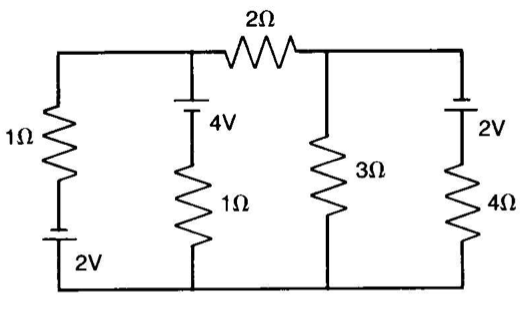

In [48]:
A=np.array([[1,-1,1,0,0,0],[0,1,0,0,1,1],[1,0,1,-1,0,0],[1,0,-1,0,0,0],[0,-2,-1,0,3,0],[0,0,0,0,3,-4]])
b=np.transpose(np.array([[0,0,0,6,4,-2]]))
I=np.linalg.solve(A,b)
print(I)
# Le courant I5 est celui désiré (cfr notes tablette) => indice numéro 4: I[4,0]
print("Le courant passant par la résistance de 3 Ohm vaut "+str("{:.3f}".format(I[4,0]))+" amperes")

[[ 2.77966102]
 [-0.44067797]
 [-3.22033898]
 [-0.44067797]
 [-0.03389831]
 [ 0.47457627]]
Le courant passant par la résistance de 3 Ohm vaut -0.034 amperes


## Exercice 5

A l'aide des lois de Kirchhoff, déterminer le courant dans chaque branche du circuit suivant, et afficher proprement la puissance dissipée par la résistance de $9\Omega$ et la différence de potentiel aux bornes de la pile A. Utilisez la notation matricielle et résolvez le système numériquement.

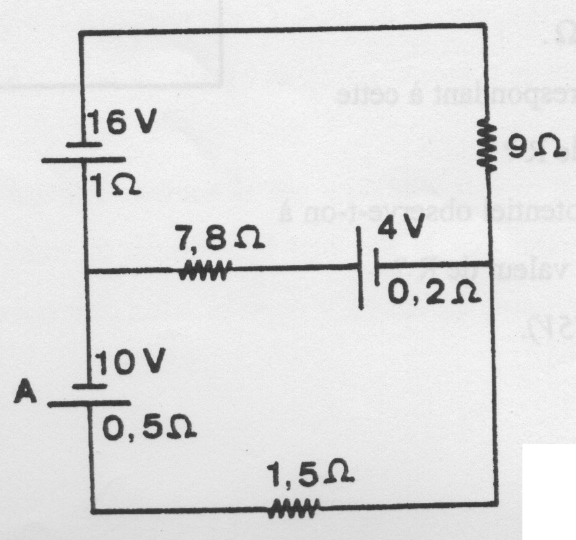

In [49]:
A=np.array([[1,-1,1],[-10,0,8],[0,-2,-8]])
b=np.transpose(np.array([[0,-12,-14]]))
I=np.linalg.solve(A,b)
print("La puissance dissipée par la resistance de 9 Ohm vaut "+str("{:.3f}".format(9*I[0,0]**2))+" watts")
print("La difference de potentiel aux bornes de A est "+str("{:.3f}".format(10-0.5*I[2,0]))+" volts")

La puissance dissipée par la resistance de 9 Ohm vaut 36.000 watts
La difference de potentiel aux bornes de A est 9.500 volts


## Exercice 6

A l’aide des lois de Kirchhoff, déterminez les équations du courant. Indiquez préalablement sur le schéma ci-dessous votre choix pour les courants et leurs sens ainsi que les noeuds et mailles considérées. Utilisez la notation matricielle et résolvez le système à l'aide de Python. Affichez ensuite proprement la puissance dissipée par la résistance de $4\Omega$.

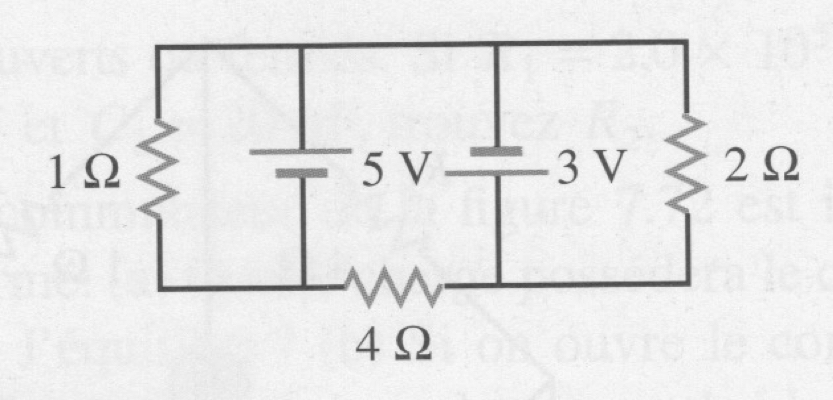

In [50]:
A=np.array([[1,-1,-1,0,0,0],[0,0,1,-1,0,-1],[0,0,0,1,1,1],[-1,0,0,0,0,0],[0,0,0,0,4,0],[0,0,0,0,0,-2]])
b=np.transpose(np.array([[0,0,0,5,-8,3]]))
I=np.linalg.solve(A,b)
print(I)
print("La puissance dissipée par la resistance de 4 Ohm vaut "+str("{:.3f}".format(4*I[4,0]**2))+" watts")

[[-5. ]
 [-7. ]
 [ 2. ]
 [ 3.5]
 [-2. ]
 [-1.5]]
La puissance dissipée par la resistance de 4 Ohm vaut 16.000 watts


## Exercice 7

Diagonalisez la matrice hermitienne suivante et affichez ses vecteurs propres. Vérifiez que l'équation aux valeurs propres est bien satisfaite.
\begin{equation*}
\left(
\begin{matrix}
1 & 3 & -3-2i & 4+5i\\
3 & 0 & 9+4i & 22 \\
-3+2i & 9-4i & -3 & 6\\
4-5i & 22 & 6 & 1
\end{matrix}
\right)
\end{equation*}

In [51]:
A=np.array([[1,3,-3-2j,4+5j],[3,0,9+4j,22],[-3+2j,9-4j,-3,6],[4-5j,22,6,1]])
print(A)

[[ 1.+0.j  3.+0.j -3.-2.j  4.+5.j]
 [ 3.+0.j  0.+0.j  9.+4.j 22.+0.j]
 [-3.+2.j  9.-4.j -3.+0.j  6.+0.j]
 [ 4.-5.j 22.+0.j  6.+0.j  1.+0.j]]


In [52]:
eigenvalues,eigenvectors=np.linalg.eig(A)

In [54]:
# Vecteur des valeurs propres de A :
print(eigenvalues)  # les VP sont réelles car A hermitienne

[ 27.39749166-1.39837205e-15j   3.58488421-1.56158519e-16j
  -9.05974243-3.00081538e-16j -22.92263343+1.85461211e-15j]


In [55]:
# Matrice des vecteurs propres normalisés (de même taille que A)
# 1 vecteur propre par colonne
# Le vecteur propre de la ième colonne correspond à la ième valeur propre du vectur eigenvalues
U=eigenvectors
print(U)

[[ 0.13356281+0.11419533j  0.85845223+0.j          0.28846421+0.34819761j
  -0.026595  +0.16437671j]
 [ 0.65711475+0.03132279j -0.05430222+0.09031747j -0.22224968+0.10939326j
   0.7033856 +0.j        ]
 [ 0.30817067-0.0796781j  -0.33977415+0.35466135j  0.77980064+0.j
  -0.10972633+0.1931895j ]
 [ 0.65956177+0.j          0.07757222-0.06859445j -0.26682153-0.23431228j
  -0.64924411-0.08149683j]]


In [56]:
# Construction de la matrice diagonale, avec les valeurs propres
D=np.diag(eigenvalues)    # matrice diagonale avec "eigenvalues" sur la diagonale
print(D)

[[ 27.39749166-1.39837205e-15j   0.        +0.00000000e+00j
    0.        +0.00000000e+00j   0.        +0.00000000e+00j]
 [  0.        +0.00000000e+00j   3.58488421-1.56158519e-16j
    0.        +0.00000000e+00j   0.        +0.00000000e+00j]
 [  0.        +0.00000000e+00j   0.        +0.00000000e+00j
   -9.05974243-3.00081538e-16j   0.        +0.00000000e+00j]
 [  0.        +0.00000000e+00j   0.        +0.00000000e+00j
    0.        +0.00000000e+00j -22.92263343+1.85461211e-15j]]


In [58]:
# Vérification de l'équation aux VP Ax=lambda*x (ici x = une colonne de U et lambda = un élément de eigenvalues)
# Vérification pour la première VP (indice 0) :
x=U[:,0]    # première colonne de U
lamb=eigenvalues[0]
print(A@x)   
print(lamb*x)    # lambda*x

[ 3.65928593+3.12866549e+00j 18.00329585+8.58165800e-01j
  8.44310343-2.18297998e+00j 18.07033815-1.45439216e-14j]
[ 3.65928593+3.12866549e+00j 18.00329585+8.58165800e-01j
  8.44310343-2.18297998e+00j 18.07033815-9.22312748e-16j]


In [59]:
# Vérification pour la deuxième VP (indice 1) :
x=U[:,1]    # deuxième colonne de U
lamb=eigenvalues[1]
print(A@x)
print(lamb*x)

[ 3.07745184+1.11022302e-16j -0.19466717+3.23777677e-01j
 -1.21805099+1.27141986e+00j  0.27808743-2.45903150e-01j]
[ 3.07745184-1.34054629e-16j -0.19466717+3.23777677e-01j
 -1.21805099+1.27141986e+00j  0.27808743-2.45903150e-01j]


In [60]:
# Vérifier l'équation Ustar@A@U = D
Ustar=np.transpose(np.conjugate(U))
print(Ustar@A@U)
print(D)

[[ 2.73974917e+01+1.11022302e-16j -4.99600361e-15+4.44089210e-16j
  -6.88338275e-15+1.66533454e-15j  1.24900090e-16-9.21485110e-15j]
 [-5.30131494e-15-1.66533454e-16j  3.58488421e+00-1.66533454e-16j
   9.29811783e-16-2.22044605e-16j  1.16573418e-15+2.55351296e-15j]
 [-6.16173779e-15-2.77555756e-15j  1.91513472e-15-4.44089210e-16j
  -9.05974243e+00+0.00000000e+00j -8.32667268e-15+6.43929354e-15j]
 [ 8.04911693e-16+8.77076189e-15j  6.66133815e-16-2.88657986e-15j
  -7.54951657e-15-6.21724894e-15j -2.29226334e+01-2.22044605e-16j]]
[[ 27.39749166-1.39837205e-15j   0.        +0.00000000e+00j
    0.        +0.00000000e+00j   0.        +0.00000000e+00j]
 [  0.        +0.00000000e+00j   3.58488421-1.56158519e-16j
    0.        +0.00000000e+00j   0.        +0.00000000e+00j]
 [  0.        +0.00000000e+00j   0.        +0.00000000e+00j
   -9.05974243-3.00081538e-16j   0.        +0.00000000e+00j]
 [  0.        +0.00000000e+00j   0.        +0.00000000e+00j
    0.        +0.00000000e+00j -22.92263343+

In [61]:
# Vérifier l'équation U@D@Ustar=A
print(U@D@Ustar)
print(A)

[[ 1.00000000e+00-1.03620261e-17j  3.00000000e+00+6.66133815e-15j
  -3.00000000e+00-2.00000000e+00j  4.00000000e+00+5.00000000e+00j]
 [ 3.00000000e+00-7.10542736e-15j -1.42108547e-14+2.75631568e-16j
   9.00000000e+00+4.00000000e+00j  2.20000000e+01-5.77315973e-15j]
 [-3.00000000e+00+2.00000000e+00j  9.00000000e+00-4.00000000e+00j
  -3.00000000e+00-2.60964122e-16j  6.00000000e+00-8.43769499e-15j]
 [ 4.00000000e+00-5.00000000e+00j  2.20000000e+01+3.33066907e-15j
   6.00000000e+00+7.54951657e-15j  1.00000000e+00+2.08002558e-16j]]
[[ 1.+0.j  3.+0.j -3.-2.j  4.+5.j]
 [ 3.+0.j  0.+0.j  9.+4.j 22.+0.j]
 [-3.+2.j  9.-4.j -3.+0.j  6.+0.j]
 [ 4.-5.j 22.+0.j  6.+0.j  1.+0.j]]


In [62]:
# Vérifions que U est bien unitaire : U@Ustar=Identité
print(U@Ustar) 

[[ 1.00000000e+00-4.93247390e-18j  1.94289029e-16+1.38777878e-16j
  -1.11022302e-16-5.55111512e-17j  1.52655666e-16+1.66533454e-16j]
 [ 1.94289029e-16-1.52655666e-16j  1.00000000e+00-3.67808877e-19j
   5.55111512e-17+3.33066907e-16j -3.88578059e-16-6.80011603e-16j]
 [-1.11022302e-16+5.55111512e-17j  5.55111512e-17-3.33066907e-16j
   1.00000000e+00+1.35275592e-18j -1.31838984e-16+1.38777878e-16j]
 [ 1.52655666e-16-1.66533454e-16j -3.88578059e-16+6.80011603e-16j
  -1.31838984e-16-1.66533454e-16j  1.00000000e+00-2.27537407e-18j]]
